In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
import collections as col

In [ ]:
df1 = pd.read_csv('Boston_reviews.csv')
df1["City"] = "Boston"
df1 = df1[["ID","City","reviews"]]
df2 = pd.read_csv('NewYork_reviews.csv')
df2["City"] = "New York"
df2 = df2[["ID","City","reviews"]]
df = df1.append(df2)
df

,ID,City,reviews
0,0,Boston,Stopped in for an early dinner/late lunch. The...
1,1,Boston,Atmosphere...tight! Outdoor seating is probabl...
2,2,Boston,I came in with extremely high expectations bec...
3,3,Boston,I ordered the most basic items you can get at ...
4,4,Boston,- Clam chowder (~$15): someone else wrote in t...
...,...,...,...
3743,3743,New York,So while I wanted to go to di fara's my cousin...
3744,3744,New York,It was a pretty good pie. Real solid pie.
3745,3745,New York,The asian server was cute but not the reason w...
3746,3746,New York,So I'm from south jersey. The walk to Brookl...


In [ ]:
df['reviews'] = df['reviews'].map(str).apply(lambda x: x.lower())

In [ ]:
American = ['bacon','waffles','sandwich','lobster','pudding','steak','burger','potatoes','wellington','truffle','jam','eggs','toast','ribs','grilled','vegan','american','fried chicken','fries','wings','wing', 'bbq','barbeque','brisket','pork','mac','beef','ribs','bacon','burgers','sandwiches','shrimp','rib','corn','beans','pie','sausage','cornbread','waffle','pulled pork','turkey','pastrami','souther','fillet','slaw','chips', 'barbecue', 'pudding', 'coleslaw', 'steakhouse', 'pancakes','brussel', 'ribeye', 'steaks', 'lettuce','oysters','oyster','ranch','collard']
Texmex = ['tacos','taco','chicken','chips','salsa','queso','mexican','texmex','fajitas','fajita','rice','cheese','margarita','margaritas','brisket','steak','shrimp','guacamole','beans','beef','meat','tortillas','burritos', 'burrito','tortilla','enchiladas','guac','avocado','chili','corn','quesadilla','fries', 'carnitas', 'bbq', 'barbeque', 'asada', 'quesadilla']
Mediterranean = ['lamb', 'humus', 'falafel', 'pita', 'pita bread','rice', 'meat','greek','mediterranean','shawarma','gyro','wrap','kabob','halal','cheese','baklava','garlic','kebab','yogurt','lebanese','feta','beef','naan','octopus','salmon','kabobs','kebabs','curry','sprouts','turkish','tahini','falafels','mezze','tzatziki','tikka','wraps','persian','lentils','gyros','cucumber','dill','tabouli']
French = ['french','bread','escargot','frites','salmon','tartare','baguette','creme','crepe','crepes','mushroom','mousse','paris','tart','croque','pastries','mignon','fillet']
Italian = ['italian','pizza','salad','pasta','sauce','wine','garlic','spaghetti','lobster','shrimp','lasagna','ravioli','calamari','alfredo','meatballs','tiramisu','caesar','crust','pizzas','pepperoni','pie','margherita','sausage','calamari','burrata','toppings','bolognese','ricotta','mozzarella','olive','basil','gnocchi','pesto','crab','prosciutto','bruschetta','arugula','carbonara','italy','artichoke']
Asian = ['rice','asian','indian','chinese','japenese','noodles','tandoori','tikka','masala','miso','sushi','ramen','curry','pork','fried rice', 'soy sauce', 'shrimp', 'thai','dumplings','dim sum','dimsum','broth','beef','meat','duck','noddle','pad thai','pad','crab','bbq','tofu','tea','buns','korean','pork belly','miso','tuna','salmon','bao','momo','dumpling','bun','naan','wings','chilli','pho','sashimi','lamb','kimchi','nigiri','soy','uni','tempura','sesame','masala','tonkotsu','bulgogi','wagyu','sprouts','cantonese','paneer','coconut','chow','balls','gyoza','squid','seaweed','edamami','wontons','wonton','truffle','biryani','scallops','scallop','cantonese','curries','samosa','samosas','kbbq','vietnamese','wasabi','shumai','octopus']


In [ ]:
# italian = ['italian','pizza','salad','pasta','sauce','wine','garlic','spaghetti','lobster','shrimp','lasagna','ravioli','calamari','alfredo','meatballs','tiramisu','caesar']
# mexican = ['tacos','taco','mexican','salsa','fajitas','chips','nachos','margarita','beans','carne','asada','margaritas','enchiladas','tortillas','guacamole','tortilla','queso','burrito']
# american = ['fried','bacon','waffles','sandwich','lobster','pudding','steak','burger','potatoes','wellington','truffle','jam','eggs','toast','ribs','grilled','vegan','american']
# asian = ['rice','asian','indian','chinese','japenese','noodles','tandoori','tikka','masala','miso','sushi','ramen','curry']
tasty = ['good', 'great', 'delicious', 'amazing', 'nice', 'tasty', 'best', 'superb', 'super', 'favorite', 'awesome', 'fantastic']
price = ['price','affordable','cost','pricy','unaffordable','money']
bad = ['bad','disappointed','horrible','shitty']
portion = ['portion','portions']
flavor = ['flavorful','flavors','smell','aroma']

In [ ]:
# word frequency of cuisine 
def attrbute_counts (attribute_list, current_attribute):
  df[current_attribute] = [0 for i in range(0, len(df['reviews']))]
  for attribute in attribute_list:
    df[current_attribute]  += df['reviews'].apply(lambda x: len(re.findall(attribute, x)))
attrbute_counts(Italian, 'Italian')
attrbute_counts(American, 'American')
attrbute_counts(Asian, 'Asian')
attrbute_counts(Texmex, 'Texmex')
attrbute_counts(Mediterranean, 'Mediterranean')
attrbute_counts(French, 'French')
df.groupby(by="reviews").sum().head(5)

,ID,Italian,American,Asian,Texmex,Mediterranean,French
reviews,,,,,,,
,29099,0,0,0,0,0,0
- car/ride share,3653,0,0,0,0,0,0
"along with other tables danny made sure we had everything we needed when we asked. as well as pretty much suggesting everything we ate. that was also big because everything he suggested was not only enjoyed by us but crazy delicious. we ordered two pies, their margherita and their brooklyn bridge. both were out of this world flavorful and delicious. we ordered a few sides that were also flavorful and delicious.",3403,2,1,0,0,0,0
"as far as drinks, my girlfriend had a glass of wine and myself a cappuccino. as expected, perfect. i highly recommend this place for anyone hungry and looking for a great slice. and be sure to be hungry, trust me haha i know my family and i will definitely be back soon and this time to try other menu items for sure.",3404,1,0,0,0,0,0
"crab meat with pork meat soup dumplings ($9.95) // succulent, juicy, and full of crab flavor! loved these and they were the best soup dumplings i've ever had.",1020,2,1,9,2,2,0


In [ ]:
# sentiment dataframe
sentimentdf = pd.DataFrame()
sentimentdf = df.copy(deep=True)
sentimentdf

,ID,City,reviews,Italian,American,Asian,Texmex,Mediterranean,French
0,0,Boston,stopped in for an early dinner/late lunch. the...,1,2,0,1,0,0
1,1,Boston,atmosphere...tight! outdoor seating is probabl...,0,0,0,0,0,0
2,2,Boston,i came in with extremely high expectations bec...,0,0,1,1,1,0
3,3,Boston,i ordered the most basic items you can get at ...,0,1,0,0,0,0
4,4,Boston,- clam chowder (~$15): someone else wrote in t...,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...
3743,3743,New York,so while i wanted to go to di fara's my cousin...,0,0,0,0,0,0
3744,3744,New York,it was a pretty good pie. real solid pie.,2,2,0,0,0,0
3745,3745,New York,the asian server was cute but not the reason w...,0,0,1,0,0,0
3746,3746,New York,so i'm from south jersey. the walk to brookl...,0,1,0,0,0,0


In [ ]:
sentimentdf.shape

(6856, 9)

In [ ]:
attributes = ['Italian','American', 'Asian','Texmex','Mediterranean','French']

print ('Word Frequency Analysis by Attributes:\n')
for attribute in attributes:
  print (attribute + ': ' + str(df[attribute].sum()))

Word Frequency Analysis by Attributes:

Italian: 3769
American: 5386
Asian: 4298
Texmex: 3215
Mediterranean: 1628
French: 735


In [ ]:
# replace cuisnine words with keyword


def replace_attr (attribute_list, current_attribute):
  for i in attribute_list:
    df['reviews'] = df['reviews'].str.replace(i,current_attribute)

replace_attr(Italian,'Italian')
replace_attr(American,'American')
replace_attr(Asian,'Asian')
replace_attr(Texmex,'Texmex')
replace_attr(Mediterranean,'Mediterranean')
replace_attr(French,'French')
replace_attr(tasty,'tasty')
replace_attr(price,'price')
replace_attr(bad,'bad')
replace_attr(flavor,'flavor')


df['reviews'].iloc[:10]

0    stopped in for an early dinner/late lunch. the...
1    atmosphere...tight! outdoor seating is probabl...
2    i came in with extremely high expectations bec...
3    i ordered the most basic items you can get at ...
4    - clam Asiander (~$15): someone else wrote in ...
5    - Italian roll & American ($34): the more rece...
6    - American (sampling of eight - ~$3/American):...
7    the service is tasty but sparse because it's s...
8    i would consider coming back (provided small w...
9    this place had an insane wait and for tasty re...
Name: reviews, dtype: object

In [ ]:
print(df.loc[df['reviews'].str.contains("delicious")])

Empty DataFrame
Columns: [ID, City, reviews, Italian, American, Asian, Texmex, Mediterranean, French]
Index: []


In [ ]:
import nltk
nltk.download('punkt')
# convert df into a list
comments_list = [str(i) for i in list(df.reviews)]

# remove all \n from the text
comments_string = " ".join(comments_list)
comments_string = comments_string.replace('\n', '')

# tokenization
tokens = word_tokenize(comments_string)
print('Total number of Tokens: ' + str(len(tokens)))

# convert to lower case
tokens = [w.lower() for w in tokens]

# remove words smaller than 4 characters
tokens = [w for w in tokens if not len(w) < 3]
print('Removing Words smaller than 4 characters: ' + str(len(tokens)))

print('\n First 10 Tokens')
print(tokens[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Total number of Tokens: 283041
Removing Words smaller than 4 characters: 197377

 First 10 Tokens
['stopped', 'for', 'early', 'dinner/late', 'lunch', 'the', 'italian', 'roll', 'was', 'decent']


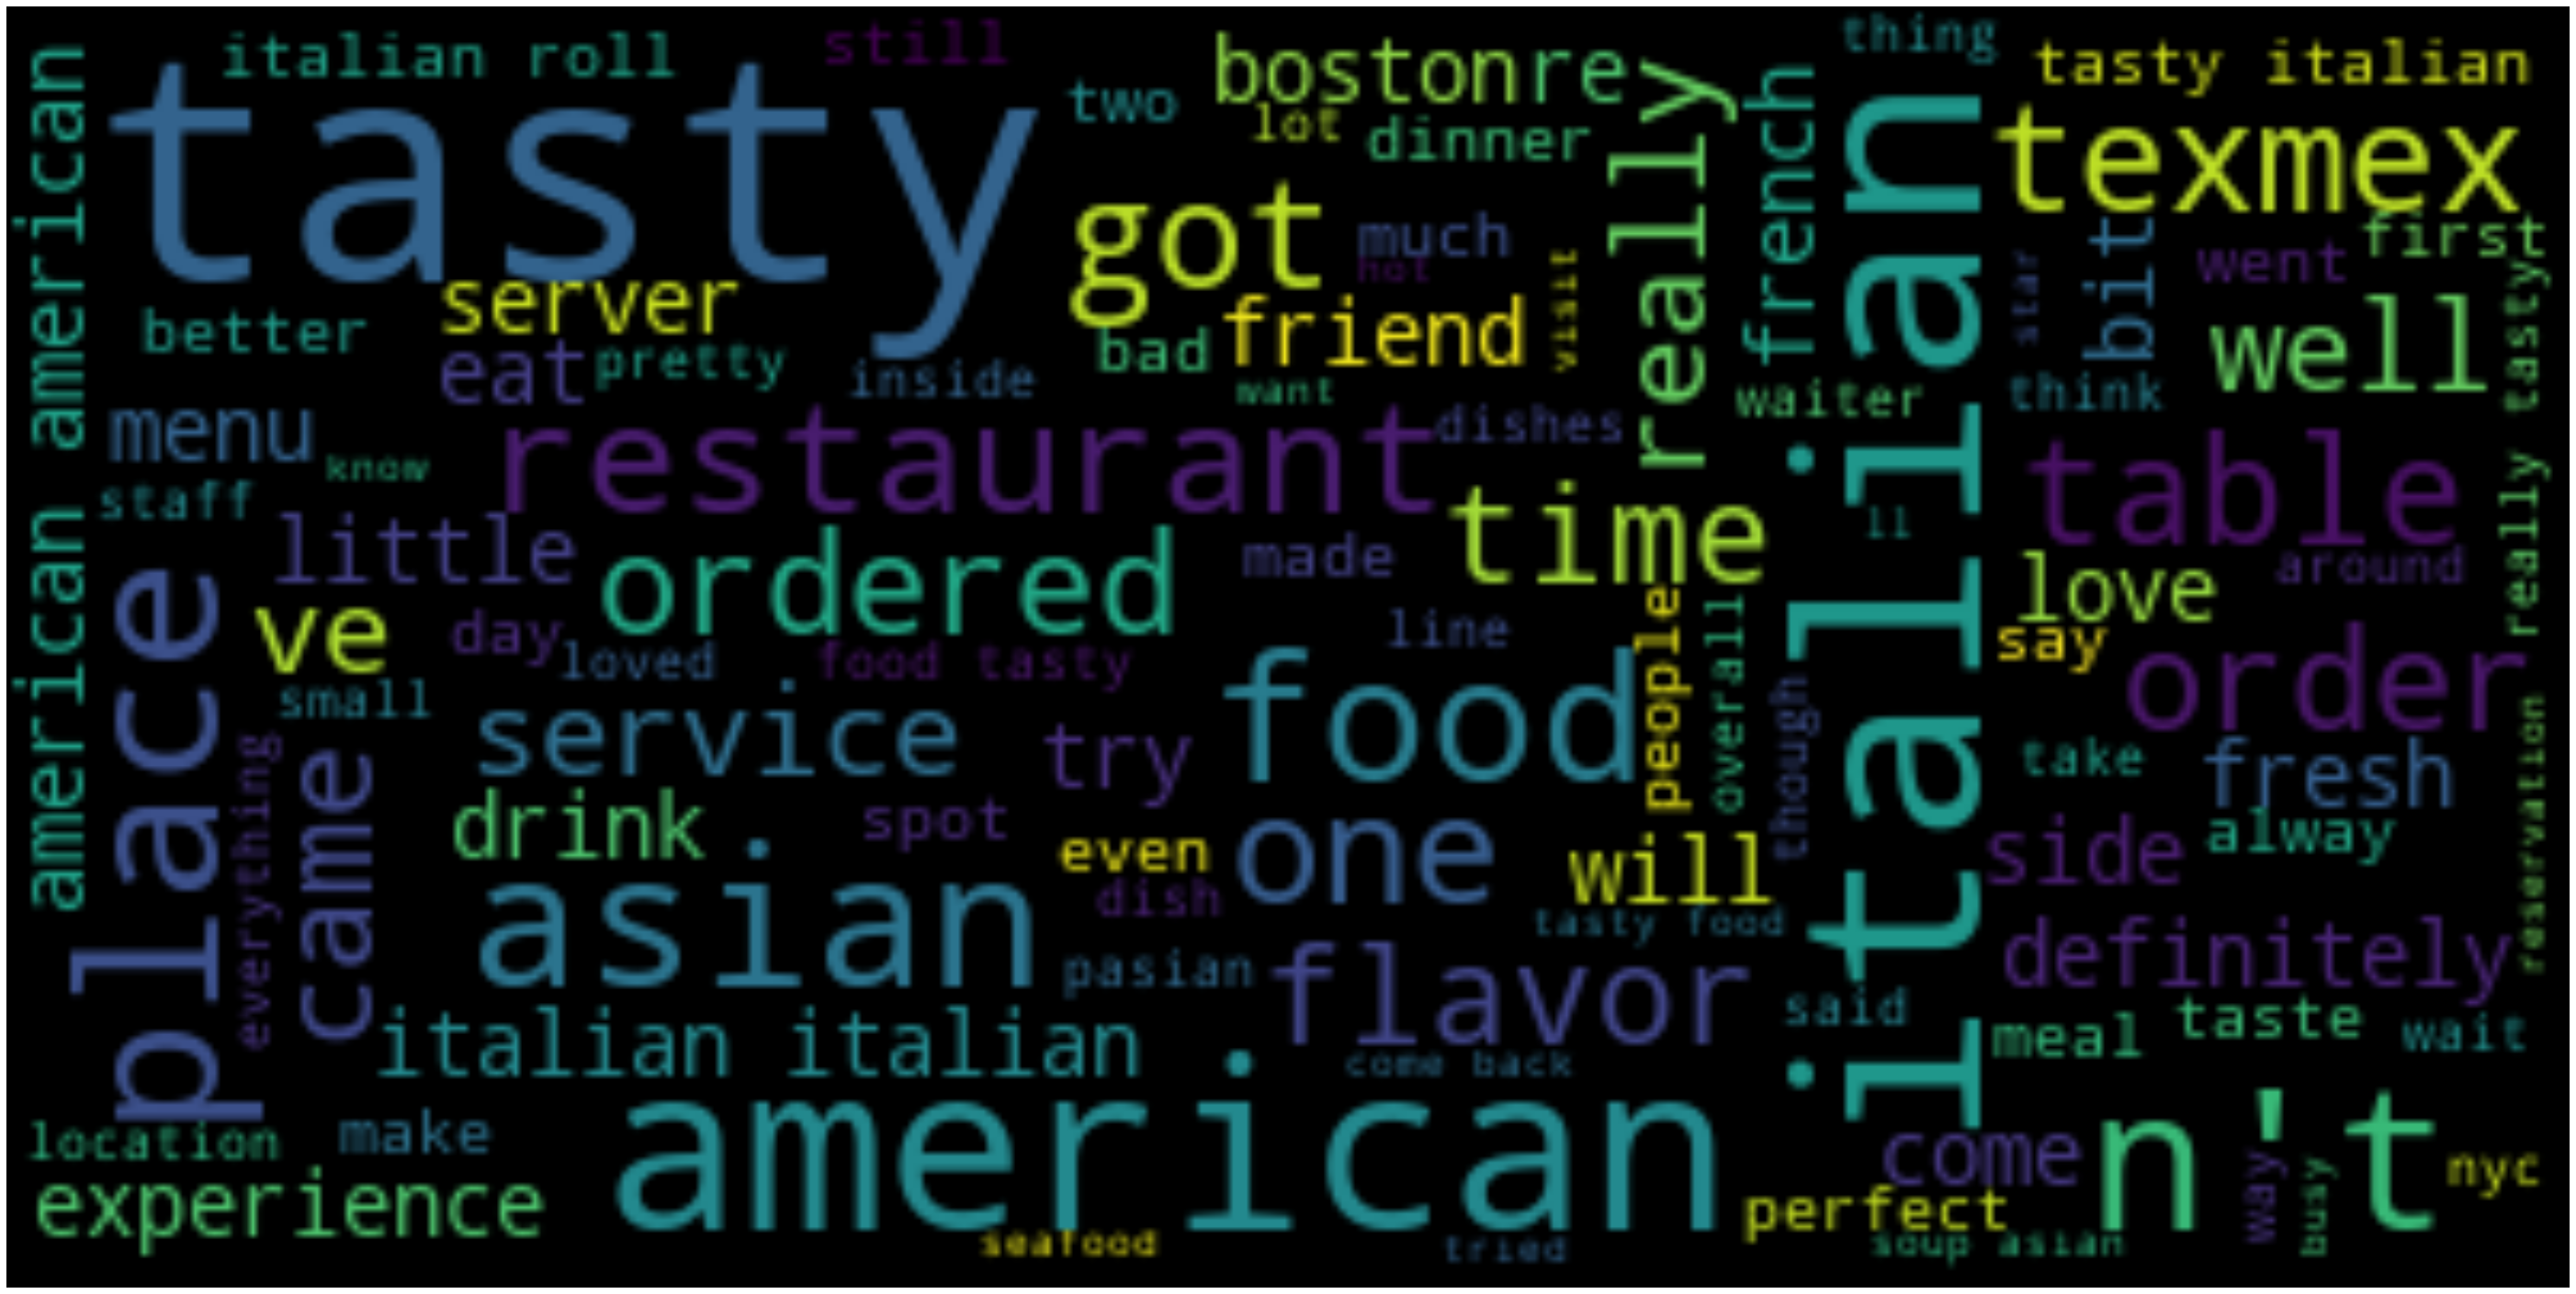

<Figure size 432x288 with 0 Axes>

In [ ]:
!pip install WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
plt.figure(figsize=(50,50))
wc = WordCloud(max_font_size=50, max_words=100, background_color='black')
wordcloud = wc.generate_from_text(' '.join(tokens))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig(r'NE_WordCloud.png')

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#filter out stop words
stop_words = stopwords.words('english')
stop_words.extend(['food','the','get','place','n\'t'])
tokens_sw = [w for w in tokens if not w in stop_words]
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens_sw]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
c = col.Counter(stripped)
counts = c.most_common(100)
print (counts[:10])

[('tasty', 4872), ('italian', 3317), ('american', 3089), ('asian', 1639), ('texmex', 815), ('time', 767), ('like', 758), ('service', 751), ('would', 693), ('got', 649)]


In [ ]:
Cuisine = ['italian','american', 'asian','texmex','mediterranean','french']
Attribute_List = ['tasty','flavor','sweet','spicy','hot','crispy','tender','price','bad','quality','portion','dry','authentic','pretty','bland','juicy','perfectly','creamy','savory','salty','chewy','texture','seasoned','crunchy','greasy','soggy']
# remove punctuation from each word
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens_sw]
print('Removing punctuations: ' + str(len(tokens)))

c = col.Counter(tokens_sw)
counts = c.most_common(10000)
print(c['Texmex'])

Removing punctuations: 197377
0


In [ ]:
arrtibute_dict = {}
for a in Attribute_List:
  arrtibute_dict[a] = arrtibute_dict.get(a,0) + c[a]

top_attr_freq = sorted(arrtibute_dict, key=arrtibute_dict.get, reverse=True)
print(top_attr_freq)
arrtibute_dict.items()

['tasty', 'flavor', 'pretty', 'bad', 'hot', 'sweet', 'quality', 'spicy', 'crispy', 'perfectly', 'price', 'portion', 'juicy', 'tender', 'dry', 'salty', 'creamy', 'texture', 'authentic', 'chewy', 'bland', 'seasoned', 'crunchy', 'savory', 'soggy', 'greasy']


dict_items([('tasty', 4859), ('flavor', 453), ('sweet', 158), ('spicy', 126), ('hot', 191), ('crispy', 121), ('tender', 90), ('price', 101), ('bad', 232), ('quality', 142), ('portion', 101), ('dry', 84), ('authentic', 55), ('pretty', 318), ('bland', 46), ('juicy', 97), ('perfectly', 121), ('creamy', 67), ('savory', 25), ('salty', 83), ('chewy', 51), ('texture', 57), ('seasoned', 41), ('crunchy', 35), ('greasy', 19), ('soggy', 25)])

In [ ]:
import itertools
cuisine_attr_pair = list(itertools.product(Cuisine, list(arrtibute_dict.keys())))
print(cuisine_attr_pair)

[('italian', 'tasty'), ('italian', 'flavor'), ('italian', 'sweet'), ('italian', 'spicy'), ('italian', 'hot'), ('italian', 'crispy'), ('italian', 'tender'), ('italian', 'price'), ('italian', 'bad'), ('italian', 'quality'), ('italian', 'portion'), ('italian', 'dry'), ('italian', 'authentic'), ('italian', 'pretty'), ('italian', 'bland'), ('italian', 'juicy'), ('italian', 'perfectly'), ('italian', 'creamy'), ('italian', 'savory'), ('italian', 'salty'), ('italian', 'chewy'), ('italian', 'texture'), ('italian', 'seasoned'), ('italian', 'crunchy'), ('italian', 'greasy'), ('italian', 'soggy'), ('american', 'tasty'), ('american', 'flavor'), ('american', 'sweet'), ('american', 'spicy'), ('american', 'hot'), ('american', 'crispy'), ('american', 'tender'), ('american', 'price'), ('american', 'bad'), ('american', 'quality'), ('american', 'portion'), ('american', 'dry'), ('american', 'authentic'), ('american', 'pretty'), ('american', 'bland'), ('american', 'juicy'), ('american', 'perfectly'), ('amer

In [ ]:
association_ba_count ={}
for j in Cuisine:
  for i in Attribute_List:
    if i != j:
      pair1 = j
      pair2 = i
      association_ba_count[pair1,pair2] = df['reviews'].map(str).apply(lambda x : 1 if x.lower().count(pair1)> 0 and x.lower().count(pair2)>0 else 0).sum()

print(association_ba_count)

{('italian', 'tasty'): 1053, ('italian', 'flavor'): 206, ('italian', 'sweet'): 87, ('italian', 'spicy'): 40, ('italian', 'hot'): 80, ('italian', 'crispy'): 67, ('italian', 'tender'): 48, ('italian', 'price'): 39, ('italian', 'bad'): 82, ('italian', 'quality'): 59, ('italian', 'portion'): 93, ('italian', 'dry'): 39, ('italian', 'authentic'): 20, ('italian', 'pretty'): 113, ('italian', 'bland'): 24, ('italian', 'juicy'): 35, ('italian', 'perfectly'): 72, ('italian', 'creamy'): 38, ('italian', 'savory'): 9, ('italian', 'salty'): 39, ('italian', 'chewy'): 28, ('italian', 'texture'): 30, ('italian', 'seasoned'): 16, ('italian', 'crunchy'): 21, ('italian', 'greasy'): 12, ('italian', 'soggy'): 16, ('american', 'tasty'): 1088, ('american', 'flavor'): 222, ('american', 'sweet'): 92, ('american', 'spicy'): 45, ('american', 'hot'): 124, ('american', 'crispy'): 75, ('american', 'tender'): 82, ('american', 'price'): 53, ('american', 'bad'): 74, ('american', 'quality'): 61, ('american', 'portion'): 

In [ ]:
cuisine_dict = {}
for a in Cuisine:
  cuisine_dict[a] = cuisine_dict.get(a,0) + c[a]

cuisine_list = list(cuisine_dict.items())
cuisine_list

[('italian', 3304),
 ('american', 3074),
 ('asian', 1632),
 ('texmex', 808),
 ('mediterranean', 34),
 ('french', 345)]

In [ ]:
lift_ba = {}
lift_cuisine_df = pd.DataFrame(columns= Cuisine, index = top_attr_freq)
attr_freq_list = [(k,v) for k,v in arrtibute_dict.items()]

for j in cuisine_attr_pair:
  lift_ba[j[0],j[1]] = ((df.shape[0]) * (association_ba_count[j[0],j[1]])) / (([item for item in cuisine_list if j[0] in item][0][1]) * ([item for item in attr_freq_list if j[1] in item][0][1]))
  lift_cuisine_df.loc[j[1],j[0]]= lift_ba[j[0],j[1]]

pd.set_option('display.max_columns', 10)
lift_cuisine_df.loc['Total']= lift_cuisine_df.sum()
lift_cuisine_df.to_csv("NE_Lift_Table.csv")
lift_cuisine_df


,italian,american,asian,texmex,mediterranean,french
tasty,0.449689,0.4994,0.874088,0.703749,2.03349,1.42326
flavor,0.943626,1.093,2.04021,1.79818,5.34164,3.33401
pretty,0.737364,0.785521,1.46638,1.01395,3.17055,2.18722
bad,0.733427,0.711395,1.62969,1.06064,1.73834,3.16932
hot,0.869135,1.44796,2.13348,1.46602,3.16723,3.95368
sweet,1.1426,1.29867,1.96755,2.36295,11.4862,4.0248
quality,0.862173,0.958095,2.10049,1.01583,4.26015,1.67936
spicy,0.658749,0.796542,2.16717,2.28964,14.4034,2.99664
crispy,1.149,1.38243,1.6665,2.73488,4.99951,3.2847
perfectly,1.23475,1.23497,1.70122,2.03363,6.66602,3.77741


# Sentiment

In [ ]:
# filtering reviews for italian
import numpy as np
final_dict = {}
for i in range(3, len(sentimentdf.columns)):    #len(df.columns)
  cuisine_array = []
  for index, row in sentimentdf.iterrows():
    if row[sentimentdf.columns[i]]>0:
      cuisine_array.append(row[sentimentdf.columns[2]])
  final_dict[sentimentdf.columns[i]]  = cuisine_array

sentimentdf

,ID,City,reviews,Italian,American,Asian,Texmex,Mediterranean,French
0,0,Boston,stopped in for an early dinner/late lunch. the...,1,2,0,1,0,0
1,1,Boston,atmosphere...tight! outdoor seating is probabl...,0,0,0,0,0,0
2,2,Boston,i came in with extremely high expectations bec...,0,0,1,1,1,0
3,3,Boston,i ordered the most basic items you can get at ...,0,1,0,0,0,0
4,4,Boston,- clam chowder (~$15): someone else wrote in t...,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...
3743,3743,New York,so while i wanted to go to di fara's my cousin...,0,0,0,0,0,0
3744,3744,New York,it was a pretty good pie. real solid pie.,2,2,0,0,0,0
3745,3745,New York,the asian server was cute but not the reason w...,0,0,1,0,0,0
3746,3746,New York,so i'm from south jersey. the walk to brookl...,0,1,0,0,0,0


In [ ]:
final_dict['Italian']

["stopped in for an early dinner/late lunch. the lobster roll was decent, but could have used a bit more flavor. the fries were awesome but i couldn't eat many because that had a lot of salt on them.",
 "- lobster roll & fries ($34): the more recent reviews say the lobster roll isn't what it used to be and i believe it. the lobster i was given tasted rubbery and worse than the last lobster roll i got at a random luke's lobster in downtown san francisco (though that roll was delicious!). the portion however was generous - the roll is a large six inch brioche roll and they stuff it with a heaping portion of (the rubbery textured) lobster.",
 "we got fresh oysters to start with a bottle of wine. i'm not a huge oyster person, but i loved it. we even considered ordering more, but we'd already ordered too much food.",
 "also the best lobster roll i've had was from here. the buttered hot lobster roll is what i would go for if i were getting a lobster roll with the arugula salad. ",
 'worth th

In [ ]:
len(final_dict['Italian'])
final_dict['American']

["stopped in for an early dinner/late lunch. the lobster roll was decent, but could have used a bit more flavor. the fries were awesome but i couldn't eat many because that had a lot of salt on them.",
 'i ordered the most basic items you can get at neptune oyster:',
 "- lobster roll & fries ($34): the more recent reviews say the lobster roll isn't what it used to be and i believe it. the lobster i was given tasted rubbery and worse than the last lobster roll i got at a random luke's lobster in downtown san francisco (though that roll was delicious!). the portion however was generous - the roll is a large six inch brioche roll and they stuff it with a heaping portion of (the rubbery textured) lobster.",
 "- oysters (sampling of eight - ~$3/oyster): these were the best part of the meal but the oysters were not better than other top oyster places i've been to (i.e. hog island in sf, walrus & carpenter in seattle). the second oyster on the list was very good though. one pro is they do hav

In [ ]:
pip install vaderSentiment

In [ ]:
italiansentiment = pd.DataFrame()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(final_dict):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_score_array = []
    #print(type(sentiment_score_array))
    #for key, value in final_dict.items():
      #print(key)
    for i in final_dict['Italian']:
      sentiment_dict = sid_obj.polarity_scores(i)
      sentiment_score_array.append(sentiment_dict['compound'])
    print(sentiment_score_array)
    italiansentiment['Italiansentiment'] = sentiment_score_array

sentiment_scores(final_dict)
print(italiansentiment)
italiansentiment['reviews'] = final_dict['Italian']
print(italiansentiment)
Attribute_List = ['tasty','flavor','sweet','spicy','hot','crispy','tender','price','bad','quality','portion','dry','authentic','pretty','bland','juicy','perfectly','flavorful','creamy','savory','salty','chewy','texture','seasoned','crunchy','greasy','soggy']
# word frequency of cuisine 
def attrbute_counts (attribute_list):
  for attribute in attribute_list:
    italiansentiment[attribute] = italiansentiment['reviews'].map(str).apply(lambda x: 1 if len(re.findall(attribute, x)) > 0 else 0)
attrbute_counts(Attribute_List)
italiansentiment.groupby(by="reviews").sum().head(5)
Food_att_Avg = {}
for i in range(2,len(italiansentiment.columns)):
  attr_list = []
  for key, value in italiansentiment.iterrows():
    if value[italiansentiment.columns[i]]>0:
      attr_list.append(value[italiansentiment.columns[0]])
  #print(attr_list)
  Food_att_Avg[italiansentiment.columns[i]] = sum(attr_list)/len(attr_list)

Food_att_Avg

[0.7351, 0.636, 0.7593, 0.6369, 0.9845, 0.7579, 0.0, 0.8926, 0.9897, 0.9594, 0.96, 0.9872, 0.8994, 0.5093, 0.9164, -0.589, 0.8639, 0.9291, 0.9696, 0.9041, 0.9307, 0.8685, 0.8906, 0.0, 0.802, 0.9604, 0.8881, 0.8715, 0.9551, 0.9945, -0.2001, 0.9482, 0.624, 0.9902, -0.6681, 0.8885, 0.8652, 0.4295, 0.0, 0.9113, 0.0, 0.3604, 0.9783, 0.9223, 0.0, 0.9913, 0.948, 0.7177, 0.6467, 0.6864, 0.0, 0.5635, 0.9081, 0.9616, 0.9706, 0.9219, 0.6058, 0.5893, 0.0, 0.9486, 0.0, -0.0727, 0.8016, 0.2003, 0.5989, -0.5256, 0.0, 0.0, 0.7184, 0.0, 0.9224, 0.106, -0.1531, 0.9106, 0.6369, 0.5669, 0.9401, 0.3446, 0.6858, 0.2382, 0.9126, 0.5142, 0.9821, 0.8176, 0.9866, 0.8216, 0.6786, -0.4449, 0.7964, -0.3724, 0.9059, 0.7835, 0.8051, 0.7951, 0.6801, 0.7946, -0.1232, 0.9508, 0.4767, 0.7089, 0.9676, 0.9651, 0.6696, 0.8257, 0.9462, 0.9425, 0.9647, 0.4215, 0.5244, 0.9348, -0.128, 0.6249, -0.5106, 0.6735, 0.2946, 0.7111, 0.9607, 0.6124, 0.7591, -0.1027, 0.1187, 0.3252, -0.5859, 0.5994, 0.765, 0.4767, 0.0, 0.4404, -0.1531,

{'authentic': 0.8612399999999999,
 'bad': 0.2509422222222223,
 'bland': 0.4539583333333333,
 'chewy': 0.6257928571428572,
 'creamy': 0.8158394736842105,
 'crispy': 0.7648373134328357,
 'crunchy': 0.8093952380952383,
 'dry': 0.5934794871794872,
 'flavor': 0.7333523316062176,
 'flavorful': 0.7877566666666664,
 'greasy': 0.6589916666666666,
 'hot': 0.7312088888888888,
 'juicy': 0.792817142857143,
 'perfectly': 0.9217874999999999,
 'portion': 0.8549086021505372,
 'pretty': 0.7942646017699115,
 'price': 0.6737896907216494,
 'quality': 0.6761152542372881,
 'salty': 0.7305923076923075,
 'savory': 0.9504000000000001,
 'seasoned': 0.6727,
 'soggy': 0.48472499999999996,
 'spicy': 0.7313449999999998,
 'sweet': 0.8343540229885057,
 'tasty': 0.7679277108433737,
 'tender': 0.7456458333333335,
 'texture': 0.7688566666666664}

In [ ]:
americansentiment = pd.DataFrame()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(final_dict):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_score_array = []
    #print(type(sentiment_score_array))
    #for key, value in final_dict.items():
      #print(key)
    for i in final_dict['American']:
      sentiment_dict = sid_obj.polarity_scores(i)
      sentiment_score_array.append(sentiment_dict['compound'])
    print(sentiment_score_array)
    americansentiment['americansentiment'] = sentiment_score_array

sentiment_scores(final_dict)
print(americansentiment)
americansentiment['reviews'] = final_dict['American']
print(americansentiment)
Attribute_List = ['tasty','flavor','sweet','spicy','hot','crispy','tender','price','bad','quality','portion','dry','authentic','pretty','bland','juicy','perfectly','flavorful','creamy','savory','salty','chewy','texture','seasoned','crunchy','greasy','soggy']
# word frequency of cuisine 
def attrbute_counts (attribute_list):
  for attribute in attribute_list:
    americansentiment[attribute] = americansentiment['reviews'].map(str).apply(lambda x: 1 if len(re.findall(attribute, x)) > 0 else 0)
attrbute_counts(Attribute_List)
americansentiment.groupby(by="reviews").sum().head(5)
Food_att_Avg = {}
for i in range(2,len(americansentiment.columns)):
  attr_list = []
  for key, value in americansentiment.iterrows():
    if value[americansentiment.columns[i]]>0:
      attr_list.append(value[americansentiment.columns[0]])
  #print(attr_list)
  Food_att_Avg[americansentiment.columns[i]] = sum(attr_list)/len(attr_list)

Food_att_Avg

[0.7351, 0.0, 0.636, 0.8744, 0.7593, 0.6369, 0.0, 0.9845, 0.9083, 0.5189, 0.0, 0.0, 0.0, 0.0, 0.8395, 0.0, 0.9274, 0.8926, 0.9897, 0.4572, 0.9594, 0.96, 0.9872, 0.8831, 0.2023, 0.0, 0.0, 0.6779, 0.8994, 0.8356, 0.5093, 0.9164, -0.589, 0.8639, 0.9291, 0.7003, 0.9696, 0.9041, 0.9307, 0.8625, 0.9039, 0.888, 0.8906, 0.0, 0.802, 0.9604, 0.9412, 0.8881, 0.8689, 0.8715, 0.8163, 0.8151, 0.9551, 0.9945, -0.2001, 0.9482, 0.7778, 0.624, 0.9902, 0.8442, -0.6681, 0.8885, 0.4215, 0.907, 0.8652, 0.4295, 0.0, 0.0, 0.9269, 0.9113, 0.9497, 0.9831, 0.9118, 0.994, 0.6369, 0.8402, 0.3604, 0.9783, 0.9223, 0.0, -0.771, 0.8795, 0.5267, 0.7506, 0.9913, 0.9594, 0.7177, 0.9457, 0.6467, 0.0, 0.9081, 0.9616, 0.4389, 0.9706, 0.0, 0.9486, 0.5989, 0.0, 0.7184, 0.9224, 0.106, -0.1531, 0.9319, 0.7823, 0.5669, 0.9401, 0.9126, 0.9821, 0.7964, 0.6801, 0.7946, 0.6811, 0.9508, 0.7089, 0.8257, 0.9462, 0.8389, 0.9647, 0.9348, -0.5106, 0.6735, 0.7111, 0.6124, 0.7591, 0.3252, 0.765, 0.8646, 0.0, 0.6901, -0.7579, 0.0, -0.7841, -

{'authentic': 0.7644583333333334,
 'bad': 0.3448098039215686,
 'bland': 0.486432,
 'chewy': 0.5054088235294117,
 'creamy': 0.8033146341463417,
 'crispy': 0.7594220930232558,
 'crunchy': 0.7832157894736842,
 'dry': 0.53536338028169,
 'flavor': 0.7119653225806454,
 'flavorful': 0.7616302631578945,
 'greasy': 0.7814307692307693,
 'hot': 0.683555844155844,
 'juicy': 0.7724024691358023,
 'perfectly': 0.9140743589743591,
 'portion': 0.7990061946902655,
 'pretty': 0.7603869565217392,
 'price': 0.6205689655172416,
 'quality': 0.6381661764705884,
 'salty': 0.6505159090909088,
 'savory': 0.913515,
 'seasoned': 0.6877833333333333,
 'soggy': 0.281675,
 'spicy': 0.7023981132075471,
 'sweet': 0.7714229357798165,
 'tasty': 0.6952663461538459,
 'tender': 0.7290511363636363,
 'texture': 0.7260969696969697}

In [ ]:
asiansentiment = pd.DataFrame()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(final_dict):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_score_array = []
    #print(type(sentiment_score_array))
    #for key, value in final_dict.items():
      #print(key)
    for i in final_dict['Asian']:
      sentiment_dict = sid_obj.polarity_scores(i)
      sentiment_score_array.append(sentiment_dict['compound'])
    print(sentiment_score_array)
    asiansentiment['asiansentiment'] = sentiment_score_array

sentiment_scores(final_dict)
print(asiansentiment)
asiansentiment['reviews'] = final_dict['Asian']
print(asiansentiment)
Attribute_List = ['tasty','flavor','sweet','spicy','hot','crispy','tender','price','bad','quality','portion','dry','authentic','pretty','bland','juicy','perfectly','flavorful','creamy','savory','salty','chewy','texture','seasoned','crunchy','greasy','soggy']
# word frequency of cuisine 
def attrbute_counts (attribute_list):
  for attribute in attribute_list:
    asiansentiment[attribute] = asiansentiment['reviews'].map(str).apply(lambda x: 1 if len(re.findall(attribute, x)) > 0 else 0)
attrbute_counts(Attribute_List)
asiansentiment.groupby(by="reviews").sum().head(5)
Food_att_Avg = {}
for i in range(2,len(asiansentiment.columns)):
  attr_list = []
  for key, value in asiansentiment.iterrows():
    if value[asiansentiment.columns[i]]>0:
      attr_list.append(value[asiansentiment.columns[0]])
  #print(attr_list)
  Food_att_Avg[asiansentiment.columns[i]] = sum(attr_list)/len(attr_list)

Food_att_Avg

[-0.395, 0.2885, 0.9845, 0.7579, 0.9083, 0.743, -0.7095, 0.8926, 0.9897, 0.6369, 0.9594, 0.96, 0.8994, 0.9164, -0.589, 0.5255, 0.9291, 0.9696, 0.9307, 0.8689, 0.8715, 0.8163, 0.9551, 0.9945, -0.2001, 0.4215, 0.8652, 0.9113, 0.9831, 0.9517, 0.6369, 0.5859, 0.9783, 0.9223, 0.6337, -0.771, 0.8795, 0.9913, 0.948, 0.9081, 0.9616, 0.9706, 0.6058, 0.0, 0.9486, 0.5989, 0.0, 0.9224, 0.9401, 0.9126, 0.9866, 0.7964, 0.7835, 0.7951, 0.8807, -0.8609, 0.9508, 0.7089, 0.9462, 0.9425, 0.7992, 0.9647, 0.5244, 0.7871, 0.6249, -0.5106, 0.6735, 0.2023, 0.4767, 0.486, 0.0, 0.6901, -0.7579, 0.7269, -0.6705, 0.0475, 0.4019, 0.9451, -0.6593, -0.8945, -0.3749, 0.9735, 0.7074, -0.3549, 0.9563, 0.958, 0.5709, 0.0281, -0.7605, -0.092, 0.927, 0.6573, 0.0292, 0.8078, 0.7682, 0.9142, 0.8295, 0.8401, 0.2023, 0.7348, 0.8945, 0.9688, 0.8306, 0.3818, 0.3254, 0.7845, 0.4767, 0.514, 0.0, 0.9205, 0.4019, 0.7475, 0.2263, 0.8698, 0.6369, 0.5106, -0.0258, -0.296, 0.9825, 0.9746, 0.8073, 0.979, 0.8126, 0.8486, 0.9865, 0.9833, 

{'authentic': 0.8326645161290323,
 'bad': 0.3796548387096773,
 'bland': 0.4076565217391305,
 'chewy': 0.6314545454545455,
 'creamy': 0.8414325581395351,
 'crispy': 0.8099507692307694,
 'crunchy': 0.4653071428571428,
 'dry': 0.5642186046511628,
 'flavor': 0.6895200000000001,
 'flavorful': 0.7585279069767439,
 'greasy': 0.8974125,
 'hot': 0.7214423611111108,
 'juicy': 0.7814948275862067,
 'perfectly': 0.9146439393939394,
 'portion': 0.7789811475409837,
 'pretty': 0.7854055118110234,
 'price': 0.5965876221498372,
 'quality': 0.5678710526315789,
 'salty': 0.670004,
 'savory': 0.9164083333333334,
 'seasoned': 0.720190909090909,
 'soggy': 0.5058363636363636,
 'spicy': 0.6683463768115941,
 'sweet': 0.7672678571428572,
 'tasty': 0.7502854368932039,
 'tender': 0.7260256097560975,
 'texture': 0.7077121212121211}

In [ ]:
texmexsentiment = pd.DataFrame()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(final_dict):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_score_array = []
    #print(type(sentiment_score_array))
    #for key, value in final_dict.items():
      #print(key)
    for i in final_dict['Texmex']:
      sentiment_dict = sid_obj.polarity_scores(i)
      sentiment_score_array.append(sentiment_dict['compound'])
    print(sentiment_score_array)
    texmexsentiment['texmexsentiment'] = sentiment_score_array

sentiment_scores(final_dict)
print(texmexsentiment)
texmexsentiment['reviews'] = final_dict['Texmex']
print(texmexsentiment)
Attribute_List = ['tasty','flavor','sweet','spicy','hot','crispy','tender','price','bad','quality','portion','dry','authentic','pretty','bland','juicy','perfectly','flavorful','creamy','savory','salty','chewy','texture','seasoned','crunchy','greasy','soggy']
# word frequency of cuisine 
def attrbute_counts (attribute_list):
  for attribute in attribute_list:
    texmexsentiment[attribute] = texmexsentiment['reviews'].map(str).apply(lambda x: 1 if len(re.findall(attribute, x)) > 0 else 0)
attrbute_counts(Attribute_List)
texmexsentiment.groupby(by="reviews").sum().head(5)
Food_att_Avg = {}
for i in range(2,len(texmexsentiment.columns)):
  attr_list = []
  for key, value in texmexsentiment.iterrows():
    if value[texmexsentiment.columns[i]]>0:
      attr_list.append(value[texmexsentiment.columns[0]])
  #print(attr_list)
  Food_att_Avg[texmexsentiment.columns[i]] = sum(attr_list)/len(attr_list)

Food_att_Avg

[0.7351, -0.395, 0.636, 0.9083, 0.9897, 0.9594, 0.9872, 0.9164, 0.9696, 0.9307, 0.8689, 0.8715, 0.8163, 0.9551, 0.9945, 0.9482, 0.8885, 0.9113, 0.9517, 0.6369, 0.9783, 0.9223, 0.8795, 0.9913, 0.9594, 0.9616, 0.0, 0.9486, 0.0, -0.0727, 0.5989, 0.0, 0.9224, 0.106, 0.5669, 0.9401, 0.6858, 0.9126, 0.9866, 0.7964, -0.8609, 0.6811, 0.7089, 0.9462, 0.9425, 0.8389, 0.7992, 0.9647, 0.9662, 0.5244, 0.9348, 0.7871, -0.5106, 0.6735, 0.7111, 0.2023, 0.4303, 0.6901, 0.7269, -0.6705, 0.0475, 0.9451, 0.7074, 0.9563, 0.958, 0.5709, 0.0281, -0.092, 0.927, 0.0292, 0.8078, 0.7682, -0.9001, 0.8401, 0.7743, 0.4025, 0.8945, 0.9688, 0.3254, 0.4767, 0.514, 0.9205, 0.4019, 0.8698, 0.5106, -0.0258, 0.9825, 0.9746, 0.8073, 0.979, 0.8126, 0.9865, 0.9833, 0.7707, 0.9681, 0.7959, 0.0, 0.2619, 0.7507, -0.8271, 0.9782, -0.6766, 0.7802, 0.0427, 0.9808, 0.8271, 0.9524, 0.6858, 0.888, 0.9392, 0.8398, 0.9477, 0.8225, 0.2263, 0.4404, 0.3716, 0.9854, 0.8707, 0.9055, 0.943, 0.8934, 0.784, 0.2732, 0.9352, 0.9625, 0.9651, 0.96

{'authentic': 0.8500466666666668,
 'bad': 0.4709679999999999,
 'bland': 0.4553444444444445,
 'chewy': 0.6259076923076924,
 'creamy': 0.8288333333333333,
 'crispy': 0.7671676056338028,
 'crunchy': 0.6768000000000001,
 'dry': 0.617142,
 'flavor': 0.7159400000000001,
 'flavorful': 0.787465079365079,
 'greasy': 0.8027250000000001,
 'hot': 0.741933333333333,
 'juicy': 0.7760515624999997,
 'perfectly': 0.9180467741935481,
 'portion': 0.777926923076923,
 'pretty': 0.77958623853211,
 'price': 0.5965876221498372,
 'quality': 0.5576794117647059,
 'salty': 0.6772536585365853,
 'savory': 0.9231624999999999,
 'seasoned': 0.742353125,
 'soggy': 0.5231916666666666,
 'spicy': 0.7710239999999997,
 'sweet': 0.8191032258064516,
 'tasty': 0.7115712643678161,
 'tender': 0.7225938271604939,
 'texture': 0.7075428571428571}

In [ ]:
medsentiment = pd.DataFrame()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(final_dict):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_score_array = []
    #print(type(sentiment_score_array))
    #for key, value in final_dict.items():
      #print(key)
    for i in final_dict['Mediterranean']:
      sentiment_dict = sid_obj.polarity_scores(i)
      sentiment_score_array.append(sentiment_dict['compound'])
    print(sentiment_score_array)
    medsentiment['medsentiment'] = sentiment_score_array

sentiment_scores(final_dict)
print(medsentiment)
medsentiment['reviews'] = final_dict['Mediterranean']
print(medsentiment)
Attribute_List = ['tasty','flavor','sweet','spicy','hot','crispy','tender','price','bad','quality','portion','dry','authentic','pretty','bland','juicy','perfectly','flavorful','creamy','savory','salty','chewy','texture','seasoned','crunchy','greasy','soggy']
# word frequency of cuisine 
def attrbute_counts (attribute_list):
  for attribute in attribute_list:
    medsentiment[attribute] = medsentiment['reviews'].map(str).apply(lambda x: 1 if len(re.findall(attribute, x)) > 0 else 0)
attrbute_counts(Attribute_List)
medsentiment.groupby(by="reviews").sum().head(5)
Food_att_Avg = {}
for i in range(2,len(medsentiment.columns)):
  attr_list = []
  for key, value in medsentiment.iterrows():
    if value[medsentiment.columns[i]]>0:
      attr_list.append(value[medsentiment.columns[0]])
  #print(attr_list)
  Food_att_Avg[medsentiment.columns[i]] = sum(attr_list)/len(attr_list)

Food_att_Avg

[-0.395, 0.9083, 0.9594, 0.8689, 0.8715, 0.8163, 0.9551, 0.9945, 0.9113, 0.9517, 0.6369, 0.9783, 0.9223, 0.8795, 0.9913, 0.6864, 0.9616, 0.0, 0.0, -0.0727, 0.9401, 0.9866, 0.7964, 0.7951, -0.8609, 0.9425, 0.7992, 0.9647, 0.5244, 0.9348, 0.7871, 0.2023, -0.5859, 0.6901, -0.7579, 0.7269, -0.6705, 0.0475, 0.9451, -0.5096, -0.3749, 0.9831, 0.9735, 0.7074, -0.2812, 0.9563, -0.092, 0.927, 0.0292, 0.7682, -0.9553, 0.8401, 0.9688, 0.514, 0.0, 0.9205, 0.4019, 0.8698, -0.0258, 0.8073, 0.8126, 0.9865, 0.7707, 0.0, 0.2619, 0.7507, 0.0427, 0.9808, 0.6858, 0.8225, 0.4404, 0.0, 0.3716, 0.9854, 0.784, 0.2732, 0.9625, 0.8421, -0.6313, 0.2508, 0.9412, 0.8481, 0.8438, 0.987, -0.7277, 0.1761, 0.9559, 0.4754, 0.8121, 0.9418, 0.9919, 0.9209, -0.2382, 0.7501, 0.8717, 0.0653, 0.8968, 0.9894, 0.0, 0.982, 0.7783, 0.8519, 0.2432, -0.7224, -0.3919, 0.9392, 0.8976, 0.91, 0.8981, 0.9878, 0.9545, 0.9468, 0.9316, 0.9872, 0.0, 0.3182, 0.7607, 0.9199, 0.9083, 0.0, 0.9141, 0.7964, 0.926, -0.4215, 0.2174, 0.7537, 0.8439,

{'authentic': 0.8578857142857144,
 'bad': 0.5411969696969697,
 'bland': 0.6572222222222223,
 'chewy': 0.6641740740740742,
 'creamy': 0.8050818181818182,
 'crispy': 0.7440081632653062,
 'crunchy': 0.6717928571428571,
 'dry': 0.6078516129032259,
 'flavor': 0.7235415584415581,
 'flavorful': 0.7852627450980391,
 'greasy': 0.73282,
 'hot': 0.7771704225352113,
 'juicy': 0.7573609756097562,
 'perfectly': 0.9233886363636361,
 'portion': 0.8094844444444445,
 'pretty': 0.8048776470588236,
 'price': 0.5965876221498372,
 'quality': 0.5701113207547169,
 'salty': 0.6692352941176469,
 'savory': 0.9438749999999998,
 'seasoned': 0.8024769230769231,
 'soggy': 0.3570428571428571,
 'spicy': 0.8485969696969697,
 'sweet': 0.7941644067796613,
 'tasty': 0.7514444444444444,
 'tender': 0.715146875,
 'texture': 0.7320391304347826}

In [ ]:
frenchsentiment = pd.DataFrame()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(final_dict):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_score_array = []
    #print(type(sentiment_score_array))
    #for key, value in final_dict.items():
      #print(key)
    for i in final_dict['French']:
      sentiment_dict = sid_obj.polarity_scores(i)
      sentiment_score_array.append(sentiment_dict['compound'])
    print(sentiment_score_array)
    frenchsentiment['frenchsentiment'] = sentiment_score_array

sentiment_scores(final_dict)
print(frenchsentiment)
frenchsentiment['reviews'] = final_dict['French']
print(frenchsentiment)
Attribute_List = ['tasty','flavor','sweet','spicy','hot','crispy','tender','price','bad','quality','portion','dry','authentic','pretty','bland','juicy','perfectly','flavorful','creamy','savory','salty','chewy','texture','seasoned','crunchy','greasy','soggy']
# word frequency of cuisine 
def attrbute_counts (attribute_list):
  for attribute in attribute_list:
    frenchsentiment[attribute] = frenchsentiment['reviews'].map(str).apply(lambda x: 1 if len(re.findall(attribute, x)) > 0 else 0)
attrbute_counts(Attribute_List)
frenchsentiment.groupby(by="reviews").sum().head(5)
Food_att_Avg = {}
for i in range(2,len(frenchsentiment.columns)):
  attr_list = []
  for key, value in frenchsentiment.iterrows():
    if value[frenchsentiment.columns[i]]>0:
      attr_list.append(value[frenchsentiment.columns[0]])
  #print(attr_list)
  Food_att_Avg[frenchsentiment.columns[i]] = sum(attr_list)/len(attr_list)

Food_att_Avg

[0.7593, 0.7579, -0.589, 0.8685, 0.9604, 0.8715, 0.9945, -0.2001, -0.6681, 0.907, 0.9113, 0.9831, 0.9913, 0.6864, 0.6058, 0.0, -0.0727, 0.8608, 0.8016, 0.9001, 0.9106, 0.9401, 0.6858, 0.9866, 0.8216, 0.3818, 0.7964, 0.3987, 0.9059, 0.6801, 0.7946, 0.4767, 0.6696, 0.9425, -0.5106, 0.6735, 0.2946, 0.7591, -0.5859, 0.6901, -0.7579, 0.9463, 0.8625, -0.6593, -0.5096, 0.9735, -0.2812, -0.3549, 0.9245, 0.0, 0.9684, -0.092, -0.9553, 0.3369, 0.7743, 0.4025, 0.8945, 0.9688, 0.3254, 0.9205, 0.9825, 0.9746, 0.8073, 0.8126, 0.0, 0.9865, 0.9833, 0.7959, 0.9132, 0.6808, 0.7802, 0.8625, 0.9808, 0.8271, 0.888, 0.9477, 0.8225, 0.5574, 0.2263, 0.0, 0.0, 0.8707, 0.9055, 0.9514, 0.9352, 0.8421, 0.0258, 0.987, -0.7277, 0.8159, 0.4754, 0.9418, 0.9786, 0.7579, 0.8968, 0.9894, 0.9673, 0.9796, 0.982, 0.8478, 0.7184, 0.5239, 0.7955, -0.7224, 0.9392, 0.8366, 0.9065, 0.8856, 0.8955, 0.8981, 0.9878, 0.6476, 0.9316, 0.9872, 0.8953, 0.0, 0.0, 0.7066, 0.6969, 0.5106, 0.34, 0.4939, 0.8807, 0.7607, -0.296, 0.7506, 0.940

{'authentic': 0.9166000000000001,
 'bad': 0.6555045454545454,
 'bland': 0.6527666666666668,
 'chewy': 0.7594499999999998,
 'creamy': 0.8014312499999998,
 'crispy': 0.9059136363636365,
 'crunchy': 0.7733875,
 'dry': 0.6792434782608696,
 'flavor': 0.7646911392405061,
 'flavorful': 0.7911250000000001,
 'greasy': 0.721075,
 'hot': 0.7732190476190475,
 'juicy': 0.8374043478260872,
 'perfectly': 0.9526423076923076,
 'portion': 0.8657435897435897,
 'pretty': 0.8323210526315791,
 'price': 0.8095975609756096,
 'quality': 0.7086533333333332,
 'salty': 0.7253217391304349,
 'savory': 0.867075,
 'seasoned': 0.7783333333333333,
 'soggy': 0.467425,
 'spicy': 0.8172473684210527,
 'sweet': 0.7768029411764704,
 'tasty': 0.7645428571428572,
 'tender': 0.7701888888888889,
 'texture': 0.6307777777777779}

Results and Analysis

https://docs.google.com/document/d/1UdrGLWxPZe2Dfh-BC6YFpvQBLzy78ojNIV78JOANVEg/edit